Spotify Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


data.csv

In [ ]:
from google.colab import files
uploaded_1 = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded_1['data.csv']))

In [ ]:
data.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168592 entries, 0 to 168591
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        168592 non-null  int64  
 1   acousticness      168592 non-null  float64
 2   artists           168592 non-null  object 
 3   danceability      168592 non-null  float64
 4   duration_ms       168592 non-null  int64  
 5   energy            168592 non-null  float64
 6   explicit          168592 non-null  int64  
 7   id                168592 non-null  object 
 8   instrumentalness  168592 non-null  float64
 9   key               168592 non-null  int64  
 10  liveness          168592 non-null  float64
 11  loudness          168592 non-null  float64
 12  mode              168592 non-null  int64  
 13  name              168592 non-null  object 
 14  popularity        168592 non-null  int64  
 15  release_date      168592 non-null  object 
 16  speechiness       16

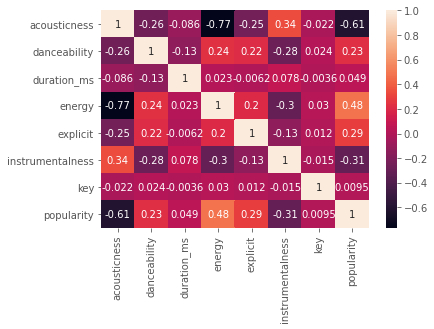

In [ ]:
#Correlation Map between the first 7 numerical columns and popularity (for sake the simplicity)
corrMatrix = data.corr()
df = pd.DataFrame(data,columns=['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'popularity'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, cbar=True, linecolor='white' ,annot=True)
sns.set(font_scale=.95)
plt.show()
#Conclusions: Popularity has a substantial correlation with energy, dancebility and explicit parameters

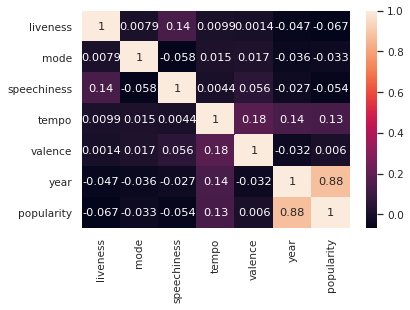

In [ ]:
#Correlation Map between last 7 numerical columns and popularity
corrMatrix2 = data.corr()
df2 = pd.DataFrame(data,columns=['liveness', 'mode', 'release_date', 'speechiness', 'tempo', 'valence', 'year', 'popularity'])
corrMatrix2 = df2.corr()
sns.heatmap(corrMatrix2, cbar=True, linecolor='white' ,annot=True)
sns.set(font_scale=.95)
plt.show()
#Conclusions: Popularity has a substantial correlation with year
#Most people using spotify are relatively young who like newer music

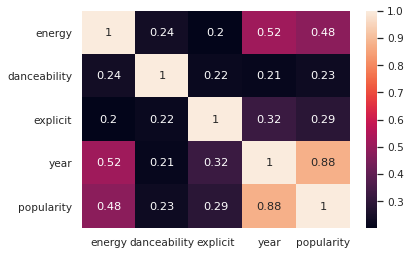

In [ ]:
#Focus on the characteristics with the highest correlations with popularity
corrMatrix_focus = data.corr()
df3 = pd.DataFrame(data,columns=['energy', 'danceability', 'explicit', 'year', 'popularity'])
corrMatrix3 = df3.corr()
sns.heatmap(corrMatrix3, cbar=True, linecolor='white', annot=True)
sns.set(font_scale=1)
plt.show()
#Conclusions: Year has the strongest correlation with popularity however energy is not too far behind and dancebility and explicit both are relatively similar

data_by_artist.csv

In [ ]:
from google.colab import files
uploaded_2 = files.upload()

Saving data_by_artist.csv to data_by_artist.csv


In [ ]:
import io
data_by_artist = pd.read_csv(io.BytesIO(uploaded_2['data_by_artist.csv']))

In [ ]:
data_by_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267
1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068
2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965
3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965
4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921


In [ ]:
data_by_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27606 entries, 0 to 27605
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27606 non-null  object 
 1   acousticness      27606 non-null  float64
 2   danceability      27606 non-null  float64
 3   duration_ms       27606 non-null  float64
 4   energy            27606 non-null  float64
 5   instrumentalness  27606 non-null  float64
 6   liveness          27606 non-null  float64
 7   loudness          27606 non-null  float64
 8   speechiness       27606 non-null  float64
 9   tempo             27606 non-null  float64
 10  valence           27606 non-null  float64
 11  popularity        27606 non-null  float64
 12  key               27606 non-null  int64  
 13  mode              27606 non-null  int64  
 14  count             27606 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.2+ MB


In [ ]:
#Artist with the highest popularity value
data_by_artist[data_by_artist['popularity']==data_by_artist['popularity'].max()]
#Conclusion: The Scotts are the most popular under artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
16321,THE SCOTTS,0.233,0.716,165978.0,0.537,0.0,0.157,-7.648,0.0514,129.979,0.28,97.0,0,0,1


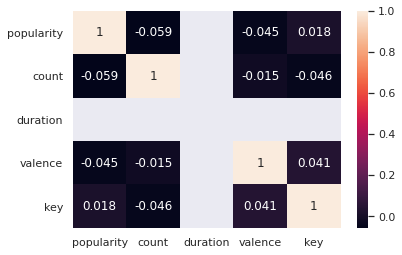

In [ ]:
#Correlation Map between popularity and number of tracks that an artist produces
corrMatrix_artist_count = data_by_artist.corr()
df4 = pd.DataFrame(data_by_artist,columns=['popularity', 'count', 'duration', 'valence', 'key'])
corrMatrix4 = df4.corr()
sns.heatmap(corrMatrix4, cbar=True, linecolor='white', annot=True)
sns.set(font_scale=1.4)
plt.show()
#Conclusion: Popularity is slightly correlated with key.
#The count, or number of tracks produced by an artist, is slightly correlated with popularity but not much
#Duration doesn't have any correlation with any of the characteristics

In [ ]:
data_by_artist['popularity'].sample(n=5)

16300    75.000000
16957    41.000000
6381     42.666667
15238    28.000000
17134    61.000000
Name: popularity, dtype: float64

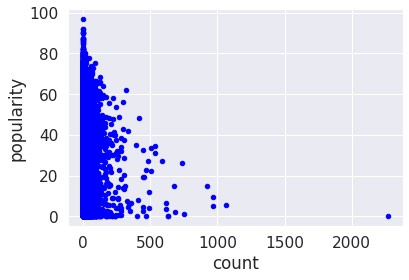

In [ ]:
#Scatter Plot
variable = pd.concat([data_by_artist['count'], data_by_artist['popularity']], axis=1)
variable.plot.scatter(x='count', y='popularity', color='blue')
#Conclusion: Popularity is more prominent if you have <500 tracks

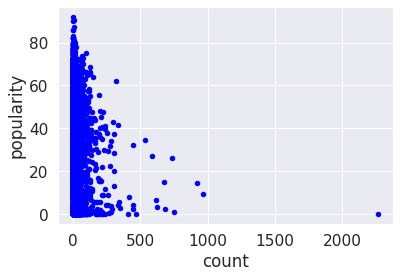

In [ ]:
#More Refined scatter plot (sample size = 20000)
variable = pd.concat([data_by_artist['count'].sample(n=20000), data_by_artist['popularity'].sample(n=20000)], axis=1)
variable.plot.scatter(x='count', y='popularity', color='blue')
#Conclusion: <250 tracks are most popular

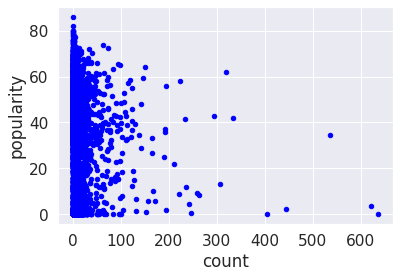

In [ ]:
#More Refined scatter plot (sample size = 12000)
variable = pd.concat([data_by_artist['count'].sample(n=12000), data_by_artist['popularity'].sample(n=12000)], axis=1)
variable.plot.scatter(x='count', y='popularity', color='blue')
#Conclusion: <200 Tracks is most popular

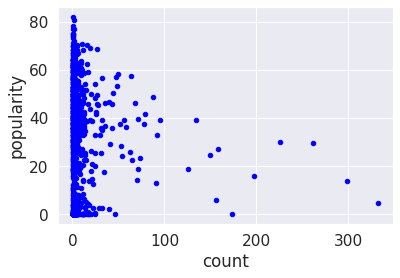

In [ ]:
#More Refined scatter plot (sample size = 5000)
variable = pd.concat([data_by_artist['count'].sample(n=5000), data_by_artist['popularity'].sample(n=5000)], axis=1)
variable.plot.scatter(x='count', y='popularity', color='blue')
#Conclusion: <200 tracks are most popular

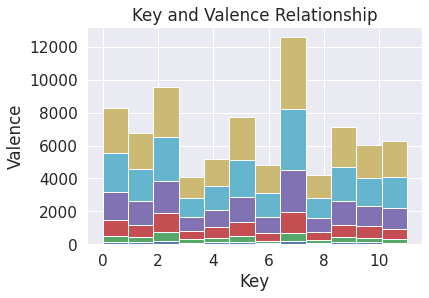

In [ ]:
#Histogram to represent key and valence (Examine the relationship between the key used and the positivity of the song)
plt.hist(x = [data_by_artist[data_by_artist['valence'] <= .1]['key'],
              data_by_artist[data_by_artist['valence'] <=.2]['key'],
              data_by_artist[data_by_artist['valence'] <=.4]['key'],
              data_by_artist[data_by_artist['valence'] <=.6]['key'],
              data_by_artist[data_by_artist['valence'] <=.8]['key'],
              data_by_artist[data_by_artist['valence'] <=1]['key']], bins=12, stacked=True, color = ['b', 'g', 'r', 'm', 'c','y'],
         label=['0-.1', '.1-.2', '.2-.4', '.4-.6', '.6-.9', '.9-1'])
plt.title('Key and Valence Relationship')
plt.xlabel('Key')
plt.ylabel('Valence')
plt.autoscale(enable=True, axis='x', tight=None)
plt.show()
#The higher the valence, the more positive a song is
#Most Songs on any key are positive
#Most are either very positive or somewhat positive (not many are VERY 'negative')
#Also shows that the songs in this data set are mostly 'positive'
#Key 7 is the most popular but also has the most diverse range with a lot of positive but a sizeable amount that are not as positive
#Keys 3, 4, 6, and 8 have a somewhat even division of very positive and also not very positive tracks

Data With Genres csv

In [ ]:
from google.colab import files
uploaded_3 = files.upload()

Saving data_w_genres.csv to data_w_genres.csv


In [ ]:
data_w_genre = pd.read_csv(io.BytesIO(uploaded_3['data_w_genres.csv']))

In [ ]:
data_w_genre.head()

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267,"['tango', 'vintage tango']"
1,1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068,"['classical', 'early romantic era', 'polish cl..."
2,2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965,"['classical', 'classical era', 'early romantic..."
3,3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965,"['classical', 'classical era']"
4,4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921,"['baroque', 'classical', 'early music', 'germa..."


In [ ]:
#Line can pull data on a row given the name of the artist-a way to search/gather data by keyword
data_w_genre[(data_w_genre=='Johann Sebastian Bach').any(1)].stack()[lambda x: x != 'Johann Sebastian Bach'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([4, 0.9584049945711216, 0.3542243213897936, 203461.7578718784,
       0.20193230184581995, 0.7443224756026062, 0.16583669923995653,
       -20.93651791530944, 0.04884375678610207, 106.5518686210642,
       0.5705261672095548, 14.704668838219328, 7, 1, 921,
       "['baroque', 'classical', 'early music', 'german baroque']"],
      dtype=object)

In [ ]:
#Pulling specific info (instead of all info) of a row by keyword
data_w_genre[data_w_genre['artists'] == 'Ludwig van Beethoven']['genres']

2    ['classical', 'classical era', 'early romantic...
Name: genres, dtype: object

In [ ]:
#Again using keyword to gather a specific artist's row
data_w_genre.loc[data_w_genre['artists'] == 'Eric Clapton']

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
97,97,Eric Clapton,0.353685,0.57433,277477.48,0.562311,0.154424,0.354195,-11.178385,0.052196,116.05178,0.645495,36.025,7,1,200,"['album rock', 'blues rock', 'classic rock', '..."


In [ ]:
#These determine if a column contains a string
genre_col = pd.Series(data_w_genre['genres'])
genre_col.str.contains('vintage', regex=False)

0         True
1        False
2        False
3        False
4        False
         ...  
27601    False
27602    False
27603    False
27604    False
27605    False
Name: genres, Length: 27606, dtype: bool

In [ ]:
#Connects genres with artists
data_w_genre.loc[genre_col.str.contains('classical', regex=False) == True]

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
1,1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068,"['classical', 'early romantic era', 'polish cl..."
2,2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965,"['classical', 'classical era', 'early romantic..."
3,3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965,"['classical', 'classical era']"
4,4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921,"['baroque', 'classical', 'early music', 'germa..."
5,5,Igor Stravinsky,0.918697,0.340100,186150.287234,0.209996,0.601525,0.233804,-20.366153,0.057502,107.555573,0.235147,1.039894,0,1,752,"['classical', 'early modern classical', 'neocl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27326,326,Franco Corelli,0.991000,0.172000,182600.000000,0.102000,0.010200,0.095900,-18.787000,0.040200,83.633000,0.068900,31.000000,11,0,1,"['classical tenor', 'italian tenor', 'opera']"
27359,359,Eric Parkin,0.994000,0.279000,119520.000000,0.034200,0.911000,0.104000,-29.696000,0.036100,87.781000,0.169000,37.000000,11,0,1,['classical piano']
27416,416,Valentin Silvestrov,0.988000,0.116000,255960.000000,0.001100,0.227000,0.099100,-39.982000,0.054400,70.332000,0.038700,47.000000,2,1,1,"['avant-garde', 'contemporary classical', 'ukr..."
27456,456,Christian Benda,0.986000,0.141000,323000.000000,0.041400,0.873000,0.107000,-28.163000,0.047600,91.276000,0.063400,36.000000,10,1,1,['classical cello']


In [ ]:
#Arranges the list in order by popularity (can do so for any other column)
data_w_genre.loc[genre_col.str.contains('k-pop', regex=False) == True].sort_values(by=['popularity'], ascending=False)

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
10197,197,ITZY,0.013837,0.800000,194086.000000,0.889333,8.410000e-05,0.230667,-3.931000,0.070533,124.004000,0.722333,76.666667,11,0,3,"['k-pop', 'k-pop girl group']"
13704,704,(G)I-DLE,0.027050,0.680000,193483.500000,0.765500,7.050000e-07,0.149500,-3.933500,0.063200,140.003000,0.433500,75.500000,7,1,2,"['k-pop', 'k-pop girl group']"
16300,300,SHAUN,0.269000,0.737000,192453.000000,0.747000,0.000000e+00,0.219000,-4.818000,0.032300,105.943000,0.447000,75.000000,10,1,1,['k-pop']
26639,639,iKON,0.331000,0.806000,209648.000000,0.707000,0.000000e+00,0.294000,-4.623000,0.030700,118.011000,0.746000,73.000000,7,1,1,"['k-pop', 'k-pop boy group']"
15032,32,NCT DREAM,0.154500,0.731500,198426.500000,0.709500,0.000000e+00,0.056150,-2.830500,0.068400,134.989000,0.607500,73.000000,5,0,2,"['k-pop', 'k-pop boy group']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071,71,Wild Child,0.702500,0.626000,170060.000000,0.603000,9.750000e-05,0.301500,-8.196500,0.202050,85.191500,0.510500,45.500000,10,1,2,"['austin americana', 'austindie', 'chamber pop..."
19985,985,S.E.S.,0.124000,0.757000,225560.000000,0.911000,0.000000e+00,0.284000,-4.005000,0.088100,101.817000,0.728000,45.000000,10,0,1,['k-pop girl group']
16653,653,Lissie,0.015800,0.509000,214173.000000,0.456000,1.370000e-03,0.108000,-8.604000,0.030800,113.889000,0.050700,44.000000,3,1,1,['folk-pop']
10072,72,Al Alberts,0.701000,0.422333,165933.333333,0.215667,9.700000e-07,0.222333,-13.423333,0.039767,120.689333,0.454667,36.666667,3,1,3,"['australian pop', 'australian singer-songwrit..."


In [ ]:
#Function that returns most popular artists given an input (Text Analysis)
def reccomendation(genre_keyword):
  if (genre_keyword is None):
    return 'Invalid Input'
  else:
    return data_w_genre.loc[genre_col.str.contains(genre_keyword, regex=False) == True].sort_values(by=['popularity'], ascending=False)

In [ ]:
#Example of reccomendation function:
reccomendation('edm')
#Possible improvement-the function only looks for artists that contain the specific keyword. Many of the genres are more specific (Belgian Pop) so an 
#improvement would be using either classification, or some other machine learning concept that is more accurate with forecasting/predicting

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
25150,150,Topic,0.223000,0.789000,166794.000000,0.720000,0.000000,0.129000,-5.652000,0.218000,122.031000,0.664000,90.000000,8,0,1,"['german dance', 'german pop', 'pop edm', 'tro..."
15109,109,MEDUZA,0.084700,0.637500,160650.000000,0.635000,0.000080,0.107000,-7.732500,0.035500,124.007500,0.580000,87.000000,10,0,2,"['edm', 'pop house']"
12641,641,Regard,0.109100,0.864000,167186.500000,0.759500,0.000425,0.150500,-4.822000,0.062350,118.454500,0.830500,84.500000,7,0,2,['pop edm']
23777,777,Axwell /\ Ingrosso,0.027500,0.646000,203000.000000,0.741000,0.000000,0.312000,-4.973000,0.034000,123.077000,0.571000,80.000000,5,0,1,"['big room', 'dance pop', 'edm', 'electro hous..."
20461,461,Like Mike,0.125000,0.765000,184558.000000,0.906000,0.000000,0.423000,-2.097000,0.096500,96.071000,0.950000,79.000000,8,0,1,"['belgian dance', 'belgian edm', 'big room', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,576,Sonny Terry,0.921750,0.548500,194282.916667,0.235208,0.315776,0.229008,-15.185583,0.056700,106.346333,0.589500,8.000000,4,1,12,"['acoustic blues', 'blues', 'country blues', '..."
1314,314,Brownie McGhee,0.908152,0.681121,176789.121212,0.353861,0.166124,0.145721,-10.597818,0.073106,109.708697,0.668121,2.636364,4,1,33,"['acoustic blues', 'blues', 'country blues', '..."
3325,325,Blind Willie McTell,0.991615,0.586154,152589.692308,0.369692,0.020457,0.202923,-8.393231,0.099700,91.156308,0.679000,2.538462,2,1,13,"['acoustic blues', 'appalachian folk', 'blues'..."
10286,286,Blind Blake,0.849667,0.727333,144866.666667,0.763000,0.000001,0.334667,-1.596667,0.067167,105.820333,0.870333,0.666667,1,1,3,"['acoustic blues', 'bahamian folk', 'blues', '..."


Data By Genre csv

In [ ]:
from google.colab import files
uploaded_4 = files.upload()

Saving datasets_670134_1185459_data_by_genres.csv to datasets_670134_1185459_data_by_genres.csv


In [ ]:
data_by_genre = pd.read_csv(io.BytesIO(uploaded_4['datasets_670134_1185459_data_by_genres.csv']))

In [ ]:
data_by_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.983000,0.218500,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000,1,1
1,432hz,0.485070,0.330000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000,6,1
2,[],0.686395,0.516830,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669,7,1
3,a cappella,0.666036,0.576732,1.961439e+05,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,38.786415,11,1
4,abstract,0.352395,0.489100,3.429772e+05,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,41.600000,1,1


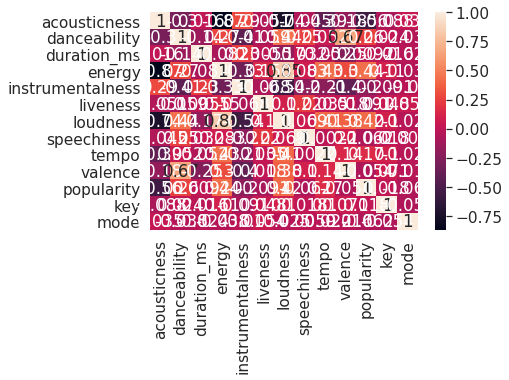

In [ ]:
#Correlation Map with this dataset
corrMatrix_by_genre = data_by_genre.corr()
df5 = pd.DataFrame(data_by_genre, columns=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key', 'mode'])
corrMatrix5 = df5.corr()
sns.heatmap(corrMatrix5, cbar=True, linecolor='white', annot=True)
sns.set(font_scale=.6)
plt.show()

In [ ]:
#Wanted to try clustering
from sklearn.cluster import KMeans
from pandas import DataFrame

K-means clustering takes a set of observations or samples and attempts to separate them into k groups or clusters. This value of k is something chosen ahead of time by whoever is creating the model, so different values of k will yield different clusters.

Optimal cluster "centers" are picked in an attempt to maximize the gaps between clusters, because we want to reduce any ambiguity in our model.

Although the algorithm used to find the clusters isn't too difficult to implement, scikit-learn, a Python library for machine learning, conveniently implements this (sklearn.cluster.KMeans) and many other machine learning methods.

Basically, clustering takes samples of the dataset and 'clusters' or forms groups based on the similarity of the values that are sampled from the specified columns. The centers can be seen as like the optimized value for each cluster. The goal is to find groups within the data.

[[ 0.51817085 36.31863497]
 [ 0.47859914 53.20293121]
 [ 0.49249919  9.55374999]]


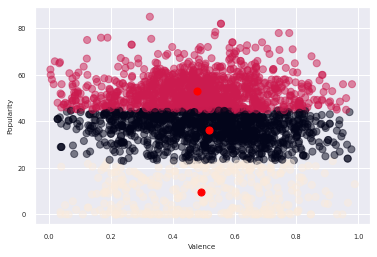

In [ ]:
#K = 3 so there will be a total of 3 groups
#Decided to specifically group the two columns of 'valence' and 'popularity'
#This was useful to do in this data set specifically because these 'clusters' will be based on the genres as they are the rows in this set
#The exact location of the clusters are randomized
dff = DataFrame(data_by_genre, columns=['valence', 'popularity'])
kmeans = KMeans(n_clusters=3).fit(dff)
#Centroids are the means of the clusters
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(dff['valence'], dff['popularity'], c=kmeans.labels_.astype(float), s=50, alpha=.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.show()
#Clusters below can be represented as 3 colors: pink, yellow (hard to see), and blue
#The 3 red dots represent the centers (centroids) of each of the clusters

**Modeling and Other Advanced Concepts**

Linear Regression, Gradient Boost

Linear Regression

In [ ]:
#Import Seaborn
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

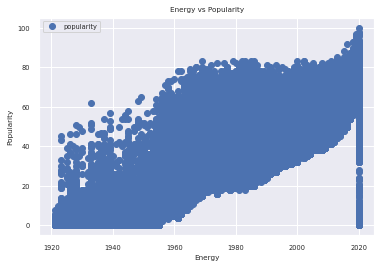

In [ ]:
#Utilizing 'Data' csv and plotting Popularity and Energy
data.plot(x='year', y='popularity', style='o')
plt.title('Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

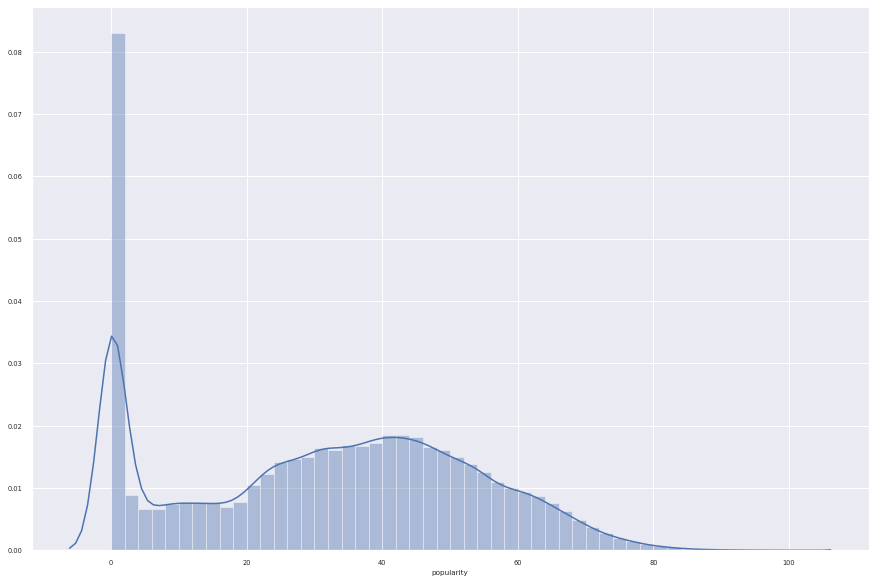

In [ ]:
#Distribution Plot
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['popularity'])

In [ ]:
#Split two characteristics into 'attributes'
#Specifically want to predict the popularity based on the year
x = data['year'].values.reshape(-1, 1)
y = data['popularity'].values.reshape(-1, 1)

#Split data so that 20% can be used for the test set and the remaining 80% of the data can be used for the training set
#Training set is used to create the model
#Test set used to qualify the performance

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Train Algorithm
#use fit() function and LinearRegression class to complete this task
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Print Slope and Intercept:
#Intercept:
print(regressor.intercept_)

#Slope
print(regressor.coef_)

#This means that for every one unit of change in year (1 year), the change in popularity is about .737%

print(regressor.score(x_test, y_test))

[-1426.21310542]
[[0.73723344]]
0.76435224946532


In [ ]:
#Create Predictions with our test set of data (20%)
y_pred = regressor.predict(x_test)

#Next line will compare the output values for x_test with the predicted values
df_linear_regression = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_linear_regression

,Actual,Predicted
0,25,23.925065
1,10,19.501664
2,34,18.027198
3,0,10.654863
4,43,54.888869
...,...,...
33714,57,54.888869
33715,5,10.654863
33716,10,15.078264
33717,33,41.618667


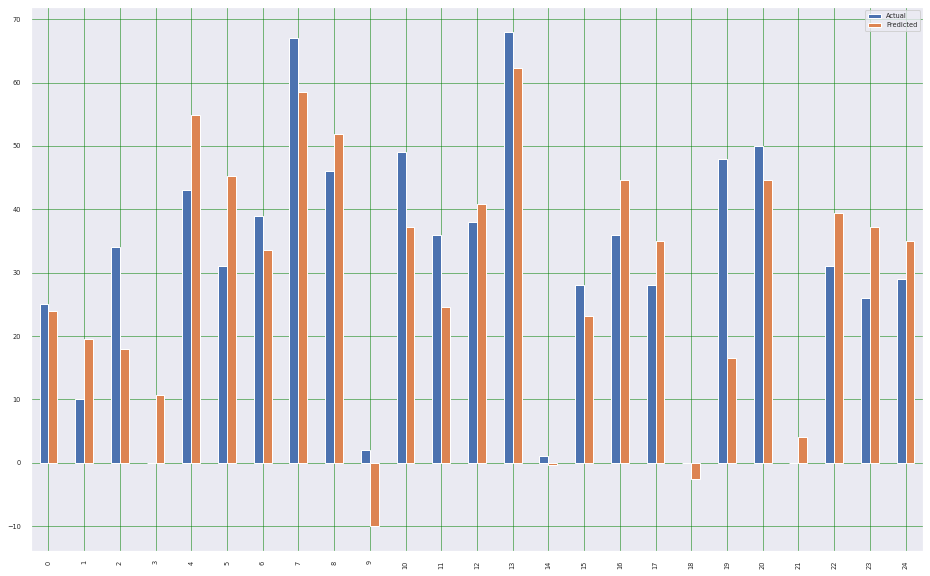

In [ ]:
#Visualize comparison as a bar graph (Return first 25 Rows)
df_linear_regression_1 = df_linear_regression.head(25)
df_linear_regression_1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

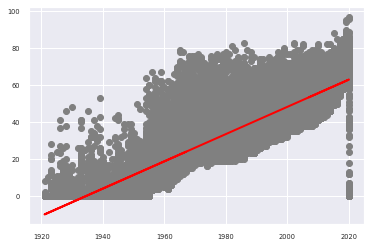

In [ ]:
#Best Fit Line-Most Common use of Linear Regression
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()
#Straight best fit line shows that the algorithm is correct

In [ ]:
#Evaluating the performacne of the prediction
#For Regression Algorithms, there are 3 metrics that can be used for evaluation:
#-Mean Absolute Error (MAE): Measure of errors between paired observations expressing the same phenomenon
#-Mean Square Error (MSE): Measures the average squares of the errors-average squared difference between estimated values and actual values
#-Root Mean Square Error (RMSE): Measures difference between values preidcted by a model or estimator, and the values observed

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.869409742243045
Mean Squared Error: 107.25904834048916
Root Mean Squared Error: 10.356594437385736


In [ ]:
#Score the Model
regressor.score(x_train, y_train)
#The score is the coefficient of determination R^2
#This is the proportion of the variance in the dependent variable (popularity) that is predictable from the independent variable (year)

0.7671695825461617